Assignment: Data preprocessing and Model comparison for Milk dataset(classification).

In [123]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

In [124]:
milk= pd.read_csv("milknew[152].csv")
milk.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


Que.	What is average pH of high, low, medium Grade Milk?

In [125]:
milk.groupby('Grade')['pH'].mean()

Grade
high      6.692578
low       6.588578
medium    6.635027
Name: pH, dtype: float64

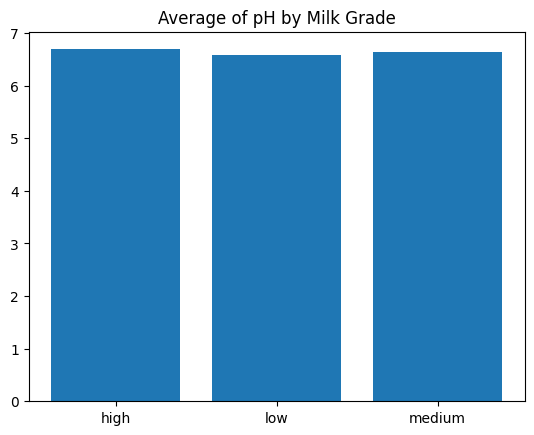

In [126]:
avg = milk.groupby('Grade')['pH'].mean()
plt.bar(avg.index,avg)
plt.title("Average of pH by Milk Grade")
plt.show()

Que.	What is average Temperature of high, low, medium Grade Milk?

In [127]:
milk.groupby('Grade')['Temprature'].mean()

Grade
high      40.648438
low       50.289044
medium    39.721925
Name: Temprature, dtype: float64

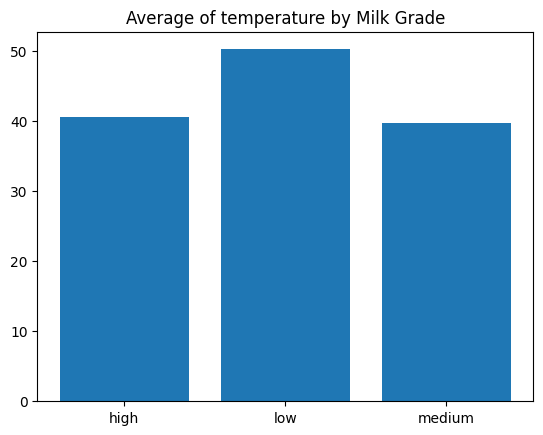

In [128]:
avg = milk.groupby('Grade')['Temprature'].mean()
plt.bar(avg.index,avg)
plt.title("Average of temperature by Milk Grade")
plt.show()

Que: In the high grade milk, what percentage of them are in 0 and 1 class of Taste?

In [129]:
pd.crosstab(milk['Grade'], milk['Taste'], margins=True, 
            normalize='index')*100

Taste,0,1
Grade,,
high,33.593750,66.406250
low,40.792541,59.207459
medium,58.556150,41.443850
All,45.325779,54.674221


Ans: In the high grade milk, 33.5937% are in '0 Class' and 66.4062% are '1 class' of Taste.

In [130]:
milk.isnull().any()

pH            False
Temprature    False
Taste         False
Odor          False
Fat           False
Turbidity     False
Colour        False
Grade         False
dtype: bool

In [131]:
lbl = LabelEncoder()
milk['Grade']=lbl.fit_transform(milk['Grade'])
milk['Grade']

0       0
1       0
2       1
3       1
4       2
       ..
1054    2
1055    0
1056    1
1057    0
1058    1
Name: Grade, Length: 1059, dtype: int32

In [132]:
x= milk.drop('Grade',axis=1)
y= milk['Grade']

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=24)

In [134]:
scaler= StandardScaler()

In [135]:
x_train_scl = scaler.fit_transform(x_train)
x_test_scl = scaler.transform(x_test)

Model1: Multinomial LogisticRegression

In [136]:
model1=LogisticRegression(penalty=None,multi_class='multinomial')
model1.fit(x_train_scl, y_train)
y_pred1=model1.predict(x_test_scl)
y_pred1_proba=model1.predict_proba(x_test_scl)
acc1=(accuracy_score(y_test, y_pred1))
loss1=(log_loss(y_test, y_pred1_proba))

c:\Users\Dell\anaconda3\envs\hf\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model2: KNeighborsClassifier

In [137]:
model2=KNeighborsClassifier()
model2.fit(x_train_scl, y_train)
y_pred2 = model2.predict(x_test_scl)
y_pred2_proba=model2.predict_proba(x_test_scl)
acc2=(accuracy_score(y_test, y_pred2))
loss2=(log_loss(y_test,y_pred2_proba))

Model3: Support Vector Classification

In [138]:
model3=SVC(probability=True)
model3.fit(x_train_scl, y_train)
y_pred3 = model3.predict(x_test_scl)
y_pred3_proba=model3.predict_proba(x_test_scl)
acc3=(accuracy_score(y_test, y_pred3))
loss3=(log_loss(y_test,y_pred3_proba))

Model4: Decision tree

In [139]:
model4= tree.DecisionTreeClassifier()
model4.fit(x_train_scl, y_train)
y_pred4 =model4.predict(x_test_scl)
y_pred4_proba=model4.predict_proba(x_test_scl)
acc4=(accuracy_score(y_test, y_pred4))
loss4=(log_loss(y_test,y_pred4_proba))

Model5: Kernel Naive Bayes

In [140]:
model5= GaussianNB()
model5.fit(x_train_scl, y_train)
y_pred5 =model5.predict(x_test_scl)
y_pred5_proba=model5.predict_proba(x_test_scl)
acc5=(accuracy_score(y_test, y_pred5))
loss5=(log_loss(y_test,y_pred5_proba))

In [141]:
acc= [acc1,acc2,acc3,acc4,acc5]
loss=[loss1,loss2,loss3,loss4,loss5]
model_name =['Multinomial LogisticRegression', "KNeighborsClassifier","Support Vector Classification",'Decision Tree','Kernel Naive Bayes']
highest_acc=max(acc)
i = acc.index(highest_acc)   
print(f'model: {model_name[i]} is getting highest accuracy score.')

model: KNeighborsClassifier is getting highest accuracy score.


In [142]:
dict = {'Model Name': model_name, 'Accuracy': acc, 'Loss': loss }
pd.DataFrame(dict, index=[1,2,3,4,5])

,Model Name,Accuracy,Loss
1,Multinomial LogisticRegression,0.855346,0.402664
2,KNeighborsClassifier,0.993711,0.237934
3,Support Vector Classification,0.943396,0.187970
4,Decision Tree,0.987421,0.453379
5,Kernel Naive Bayes,0.943396,0.251472
